# Machine Learning Foundation Nanodegree 2018-2019
## Project 3: Investigate a Dataset (TMDb Movie Analysis)
### Submission by: Aaron Balson Caroltin .J


### Table of Contents
<ul>
<li><a href="#intro">I. Introduction</a></li>
<li><a href="#wrangling">II. Data Wrangling</a></li>
<li><a href="#eda">III. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">IV. Conclusions</a></li>
</ul>

<a id='intro'></a>
## I. Introduction

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This dataset under investigation is a sub-set / kaggle version of TMDb movies with about 10K movies (rows) and 21 attributes (columns). It is a great place to start digging in to perform exploratory data analysis with data on the plot, cast, crew, budget, and revenues of several thousand films.

<u>Questions we will try answer</u>
1. Top 5 movies with most budget, revenue, profit
2. Find which genres are behind successful movies
3. Find profitable movie release trend
4. Find profitable movie runtime strategy

In [340]:
# All imports

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## II. Data Wrangling


### (i) General Properties

In [341]:
# Load Movie data
data = pd.read_csv('tmdb-movies.csv')

# Shape, Size, Dim and Structure of data
print('Data Shape (rows, cols):', data.shape)
print('Data Size (rows x cols):', data.size)
print('Data Dimensions:', data.ndim)

print('Data Structure:')
data.info()

# Display first 5 rows
data.head()



Data Shape (rows, cols): (10866, 21)
Data Size (rows x cols): 228186
Data Dimensions: 2
Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [342]:
# Additional observations

print('popularity (min, max) =', data['popularity'].min(), data['popularity'].max())
print('vote_count (min, max) =', data['vote_count'].min(), data['vote_count'].max())
print('vote_average (min, max) =', data['vote_average'].min(), data['vote_average'].max())
print('runtime (min, max) =', data['runtime'].min(), data['runtime'].max())
print('revenue (min, max) =', data['revenue'].min(), data['revenue'].max())

popularity (min, max) = 6.500000000000001e-05 32.985763
vote_count (min, max) = 10 9767
vote_average (min, max) = 1.5 9.2
runtime (min, max) = 0 900
revenue (min, max) = 0 2781505847


In [343]:
# finding the movies with longest runtime, most popular
print('Most Runtime:')
data.loc[data['runtime'].idxmax()]

Most Runtime:


id                                                                 125336
imdb_id                                                         tt2044056
popularity                                                       0.006925
budget                                                                  0
revenue                                                                 0
original_title                              The Story of Film: An Odyssey
cast                    Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
homepage                http://www.channel4.com/programmes/the-story-o...
director                                                     Mark Cousins
tagline                                                               NaN
keywords                cinema|nouvelle vague|hindi cinema|cinema novo...
overview                The Story of Film: An Odyssey, written and dir...
runtime                                                               900
genres                                

In [344]:
print('Most Popular:')
data.loc[data['popularity'].idxmax()]

Most Popular:


id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action

**Initial Observations**: 
1. All monetary columns are assumed to be of $USD
2. Popularity column (range: 6.5 - 32) is assumed to be of some derived column based on vote_average (range: 0 - 10) and vote_count columns so we will only carry popularity column forward.
3. Film duration (runtime) seems to be in minutes (with an outlier of 900 minutes for British documentary film The Story of Film: An Odyssey which was targeted to TVs than Theatres).
4. Some movies have co-directors, multiple genres, production companies (Piped) but we will assume those combinations to be of seperate and distinct value in those columns (we could have performed one-hot encoding based on questions we seek to answer but we won't be doing it for this analysis)


### (ii) Data Cleaning

In [345]:
print("Cols before removal:", data.shape[1])

# Dropping columns not required for further analysis
cols_to_delete=[ 'id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 
                'vote_count', 'vote_average', 'budget_adj', 'revenue_adj']
data.drop(cols_to_delete,axis=1, inplace=True)

# change date columns to datetime
data.release_date = pd.to_datetime(data['release_date'])

print("Cols after removal:", data.shape[1])

Cols before removal: 21
Cols after removal: 10


In [346]:
print("Rows before duplicates removal:", data.shape[0])

# Dropping duplicate rows
data.drop_duplicates(keep ='first', inplace=True)

print("Rows after duplicates removal:", data.shape[0])


Rows before duplicates removal: 10866
Rows after duplicates removal: 10865


In [347]:
print("Count of null values in each column:")

# check columns with null values
data.isnull().sum()

Count of null values in each column:


popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

In [348]:
print("Rows before null handling:", data.shape[0])

# Remove rows with "null" director column
data.dropna(subset=['director'], inplace=True) 

# Replace "null" with "NA" for cast, genres columns
data["cast"].fillna("NA", inplace = True) 
data["genres"].fillna("NA", inplace = True) 

print("Rows after null handling:", data.shape[0])


Rows before null handling: 10865
Rows after null handling: 10821


In [349]:
print("Rows before zero handling", data.shape[0])

# remove zero budget & zero revenue movies
cond1 = data['budget'] != 0
cond2 = data['revenue'] != 0
data_nonzero = data[cond1 & cond2]
#data.drop(data[cond1 & cond2].index, inplace=True)

print("Rows after zero handling", data_nonzero.shape[0])

print('Finalized dataset:')
data.head()

Rows before zero handling 10821
Rows after zero handling 3853
Finalized dataset:


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


<a id='eda'></a>
## III. Exploratory Data Analysis

### Research Question 1 (Top 5 movies with most budget, revenue, profit)

In [350]:
# Finding top 5 movies with highest budget
print('Highest budget movies:')
data_nonzero.nlargest(5, 'budget')[['budget', 'original_title', 'release_year']]

Highest budget movies:


,budget,original_title,release_year
2244,425000000,The Warrior's Way,2010
3375,380000000,Pirates of the Caribbean: On Stranger Tides,2011
7387,300000000,Pirates of the Caribbean: At World's End,2007
14,280000000,Avengers: Age of Ultron,2015
6570,270000000,Superman Returns,2006


In [351]:
# Finding top 5 movies with highest revenue
print('Highest revenue movies:')
data_nonzero.nlargest(5, 'revenue')[['revenue', 'original_title', 'release_year']]

Highest revenue movies:


,revenue,original_title,release_year
1386,2781505847,Avatar,2009
3,2068178225,Star Wars: The Force Awakens,2015
5231,1845034188,Titanic,1997
4361,1519557910,The Avengers,2012
0,1513528810,Jurassic World,2015


In [352]:
# Finding top 5 movies with highest profit

data_nonzero['profit'] = pd.to_numeric(data_nonzero['revenue'] - data_nonzero['budget'])
#data_nonzero.assign(profit=data_nonzero.revenue - data_nonzero.budget)
#data_nonzero['profit'] = data_nonzero['profit'].astype(int)
#data_nonzero['profit'] = data_nonzero['profit'].apply(lambda x: '{:.2f}'.format(x))
#data_nonzero['profit'] = pd.to_numeric(data_nonzero['profit'])
#data_nonzero['profit'] = data_nonzero['profit'].apply(pd.to_numeric, downcast='float', errors='coerce')

print('Highest profit movies:')
data_nonzero.nlargest(5, 'profit')[['profit', 'original_title', 'release_year']]

#data_nonzero.info()

Highest profit movies:


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,profit,original_title,release_year
1386,2544505847,Avatar,2009
3,1868178225,Star Wars: The Force Awakens,2015
5231,1645034188,Titanic,1997
0,1363528810,Jurassic World,2015
4,1316249360,Furious 7,2015


**Observation:** The top 5 list seems to be in align with the popularity of these movies and hence i will agree on the list.


### Research Question 2  (Find which genres are behind successful movies)

Profitable movies: 2777
Successful genres:
Drama              1171
Comedy             1009
Thriller            839
Action              788
Adventure           575
Romance             473
Crime               465
Science Fiction     382
Horror              343
Family              340
Fantasy             296
Mystery             222
Animation           162
Music                94
History              94
War                  89
Western              33
Documentary          26
Foreign               3
TV Movie              1
dtype: int64


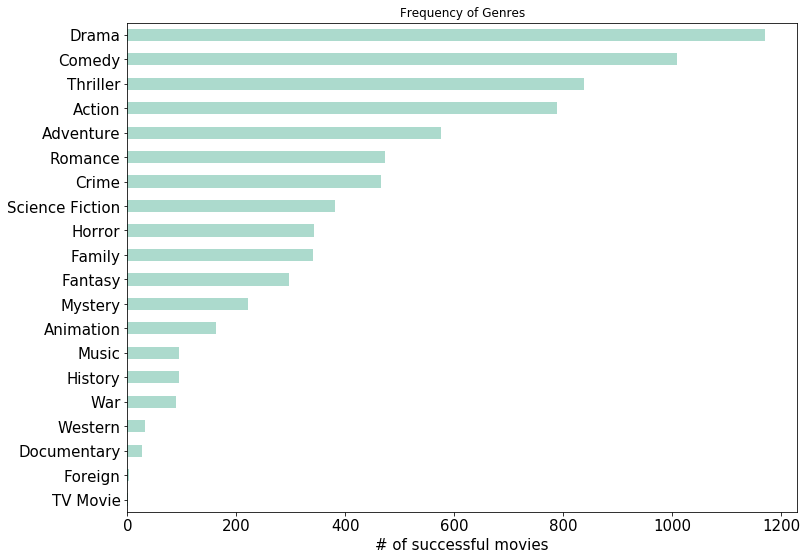

In [353]:
# Helper functions
def get_series_count(df, column, ascend):
    """ Get the split based on | and returns entries in the series """
    df_temp = df[column].str.cat(sep = '|')
    df_temp = pd.Series(df_temp.split('|'))
    series = df_temp.value_counts(ascending = ascend)
    
    return series

#get genres for successful movies (profit > 0)
profit_data = data_nonzero[data_nonzero['profit'] > 0]
genres = get_series_count(profit_data, 'genres', ascend=False)

print('Profitable movies:', profit_data['profit'].count())
print('Successful genres:')
print(genres)

#show best genres from top to bottom on a horizontal bar chart
genres.sort_values(ascending = True, inplace = True)
crt = genres.plot.barh(color = '#acdacd', fontsize = 15)

#title, label, figure size
crt.set(title = 'Frequency of Genres')
crt.set_xlabel('# of successful movies', color = 'black', fontsize = '15')
crt.figure.set_size_inches(12, 9)

plt.show()

**Observation:** I can agree on the top 5 genres however the database is more inclined towards hollywood / english viewers and hence the culture, age of viewers have to be taken into account.

### Research Question 3  (Find profitable movie release trend)

In [354]:
# Find total yearly profit from all profitted movies and based on release_year
total_yearly_profit = profit_data.groupby('release_year')['profit'].sum()
#print(total_yearly_profit)
total_yearly_profit.describe()


count    5.600000e+01
mean     5.121541e+09
std      5.554346e+09
min      5.246869e+07
25%      6.496452e+08
50%      2.281079e+09
75%      8.892808e+09
max      1.944833e+10
Name: profit, dtype: float64

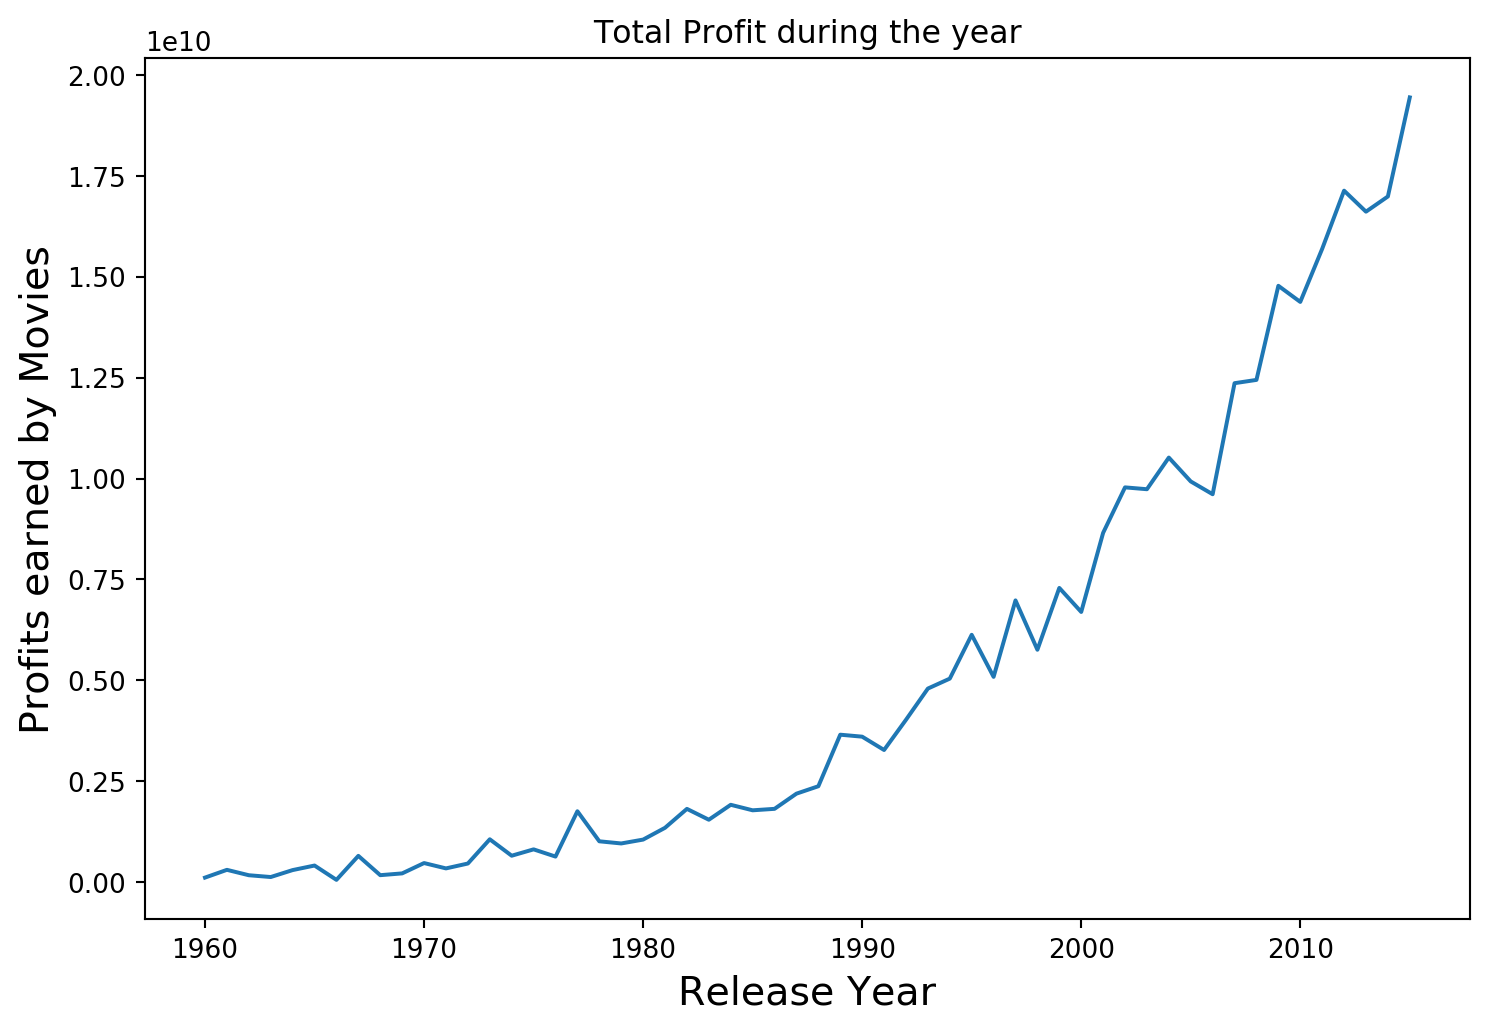

In [355]:
# plot line graph to describe the trend
plt.figure(figsize=(9,6), dpi = 190)

#set axis, labels, title
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Profits earned by Movies', fontsize = 15)
plt.title('Total Profit during the year')

#plot & show

plt.plot(total_yearly_profit)
plt.show()

**Observation:** based on single-variable (1d) and multiple-variable (2d) explorations, the reason we are seeing an upward trend for # of successful movies released can be attributed to the increased professionalism in the highly competitive movie making field. Technology also plays major role in making a movie hit. Viewership has increased since the age of internet as well.

### Research Question 4  (Find profitable movie runtime strategy)

In [356]:
# describe the runtime (minutes)

profit_data['runtime'].describe()

count    2777.000000
mean      110.159165
std        20.113490
min        26.000000
25%        96.000000
50%       106.000000
75%       121.000000
max       248.000000
Name: runtime, dtype: float64

Text(0.5,1,'Successful movie runtime released before 1980')

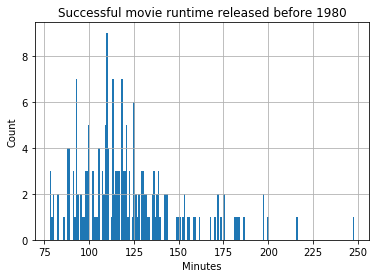

In [357]:
# Movie runtime for profitable movies
profit_data['runtime'][profit_data['release_year'] < 1980].hist(bins=200);
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.title('Successful movie runtime released before 1980')

Text(0.5,1,'Successful movie runtime released after 1980')

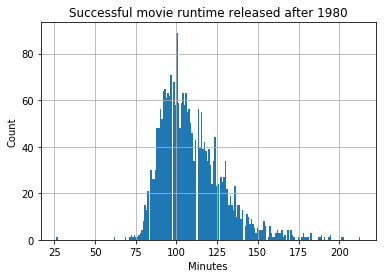

In [358]:
profit_data['runtime'][profit_data['release_year'] >= 1980].hist(bins=200);
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.title('Successful movie runtime released after 1980')

**Observation:** based on single-variable (1d) and multiple-variable (2d) explorations, the sweet spot seems to be around 90-110 minutes mark (mean = 110.159165).<br/>
Irrespective of older or newer movies, people wish to get entertained for about the same time (boredom threshold)


<a id='conclusions'></a>
## IV. Conclusions

It is found that for a movie to be hit, it has to be around 110 minutes long, be in any one of these genres (Drama, Comedy, Thriller, Action, Adventure). Ofcourse, it needs the correct timing of the public as well the cast & crew performance. Only 2777 movies were profitable but it could be attributed to lack of accurate budget or revenue data out of 3843 datapoints we started with (having non-zero budget, revenue). Also we are unaware of how the popularity was derived as different audience can provide different ratings yet, only same type of audience usually get to vote mostly (internet savvy and/or young) so it can skew such datasets collected via online. Overall, it was an interesting project and entertaining experience, will surely look deeply into the dataset in future for different ideas.

**References:**

https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c
https://pandas.pydata.org/pandas-docs
